<h3>Binary classification with linear boundary</h3>
<br>
<p>Starting with a random line (w<sub>1</sub>x<sub>1</sub>+w<sub>2</sub>x<sub>2</sub>+b=0) and gradually adjusting weights (w<sub>1</sub> w<sub>2</sub> b) such as positive points (class 1 of objects) will be located in positive area (w<sub>1</sub>x<sub>1</sub>+w<sub>2</sub>x<sub>2</sub>+b&gt;0) and negative points (class 2 of objects), in negative area (w<sub>1</sub>x<sub>1</sub>+w<sub>2</sub>x<sub>2</sub>+b&lt;0).</p>

errs in admitted zone:  1 errs in rejected zone:  6


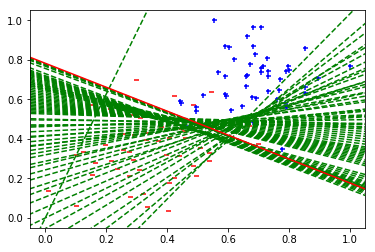

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k',marker='_')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'blue', edgecolor = 'k',marker='+')

def display(m, n, color='g--'):
    global datamin, datamax
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-5, 5, 0.1)
    plt.plot(x, m*x+n, color)

def initLine():
    x1 = np.random.rand(1)[0]
    y1 = 0
    x2 = np.random.rand(1)[0]
    y2 = 1
    b = np.random.rand(1)[0]
    m = (y2-y1)/(x2-x1)
    n = y1 - m * x1
    #display(m,n)
    w2 = -b/n
    w1 = -m*w2
    W = np.array([w1,w2])
    return W,b


#-----------------------------------------------------
# Fixing random state for reproducibility
#np.random.seed(1)

#random data points
#N = 6
#data = np.array(np.random.rand(N,3))
#data[::,2] = np.random.randint(2, size=N)

#array data points: x1, x2
#data = np.array([
#    [0.28488,0.52142,1],
#    [0.27633,0.21264,1],
#    [0.39748,0.31902,1],
#    [0.44274,0.59205,0],
#    [0.85176,0.6612,0],
#    [0.60436,0.86605,0]
#])
#X = data[:, [0,1]]
#y = data[:, [2]]
#y = y.flatten()

#file data points
data = pd.read_csv('data2.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])

#---------------------------------------------------------

import sys

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

# S = w1 X x1 + w2 X x2 + b
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b))

#how many errors(misclassified points) are there now
def efficiency(X, y, W, b):
    admitted = 0
    rejected = 0
    points=[]
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        #errors in addmitted zone
        if y[i]-y_hat == 1:
            admitted += 1
            points.append([X[i],1])
        #errors in rejected zone
        if y[i]-y_hat == -1:
            rejected += 1
            points.append([X[i],0])
    return admitted, rejected, points

#ideal state:
#admitted: y[i]=1 prediction = 1 (positive point in positive area)
#rejected: y[i]=0 prediction = 0 (negative point in negative area)
#improving state:
#admitted: y[i]=1 prediction = 0 ==> y[i]-y_hat == 1
#rejected: y[i]=0 prediction = 1 ==> y[i]-y_hat == -1
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        #positive point ( y[i]=1 ) in negative area ( y_hat=0 )
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        #negative point ( y[i]=0 ) in positive area ( y_hat=1 )
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

#0.01 25
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 70):
    boundary_lines = []

    #initial random line
    #W, b = initLine()
    W = np.array([-1.22,0.39])
    b=0
    boundary_lines.append((-W[0]/W[1], -b/W[1]))

    for i in range(num_epochs):
        #print(W,b)
        # In each epoch, we apply the perceptron step.
        # X - data points array # y - points type (0,1) # W - weights array (line: w1,w2) 
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        pass

    admitted, rejected, points = efficiency(X, y, W, b)
    print("errs in admitted zone: ", admitted, "errs in rejected zone: ", rejected)
    return boundary_lines

boundary_lines = trainPerceptronAlgorithm(X, y)

for line in boundary_lines[:len(boundary_lines)-1]:
    display(line[0],line[1])
lastLine=boundary_lines[len(boundary_lines)-1]
display(lastLine[0],lastLine[1],color='r-')

plot_points(X, y)
plt.show()


Reference

<a href="https://classroom.udacity.com/courses/ud188/lessons/b4ca7aaa-b346-43b1-ae7d-20d27b2eab65/concepts/dc837952-c0d8-43fc-921c-f1ffe316c795">Udacity-Perceptron algoritm</a>